# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [91]:
%pip install palmerpenguins
import palmerpenguins as pen
df = pen.load_penguins()
df = df.dropna(subset = ['bill_length_mm', 'bill_depth_mm'])
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


To predict bill_depth_mm, we need to dummify species, island and sex.

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [92]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [93]:
# need to use train vs test from Last chapter: fit vs complexity
lr = LinearRegression()

X = df[['bill_length_mm']]
y = df['bill_depth_mm']

X = X.dropna()  
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr_fit1 = lr.fit(X_train, y_train)

train_preds = lr_fit1.predict(X_train)
test_preds = lr_fit1.predict(X_test)
pred1 = lr_fit1.predict(X).ravel()


In [94]:
print("MSE1_train:", {mean_squared_error(y_train, train_preds)})
print("MSE1_test:", {mean_squared_error(y_test, test_preds)})

print("R2_1_train:", {r2_score(y_train, train_preds)})
print("R2_1_test:", {r2_score(y_test, test_preds)})


MSE1_train: {3.849332641093949}
MSE1_test: {2.9866229513551916}
R2_1_train: {0.04729652191878875}
R2_1_test: {0.083159765439894}


In [108]:
poly = PolynomialFeatures(degree=2)  # Degree 2 for X, X**2

X_2 = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2)

lr_fit2 = lr.fit(X_train, y_train)

train_preds2 = lr_fit2.predict(X_train)
test_preds2 = lr_fit2.predict(X_test)
pred2 = lr_fit2.predict(X_2).ravel()


In [109]:
print("MSE2_train:", {mean_squared_error(y_train, train_preds2)})
print("MSE2_test:", {mean_squared_error(y_test, test_preds2)})

print("R2_2_train:", {r2_score(y_train, train_preds2)})
print("R2_2_test:", {r2_score(y_test, test_preds2)})

MSE2_train: {3.617161584674574}
MSE2_test: {2.8372683269513317}
R2_2_train: {0.11692813966006932}
R2_2_test: {0.06173790069824636}


In [110]:
poly3 = PolynomialFeatures(degree=3)  

X_3 = poly3.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_3, y, test_size=0.2)

lr_fit3 = lr.fit(X_train, y_train)

train_preds3 = lr_fit3.predict(X_train)
test_preds3 = lr_fit3.predict(X_test)
pred3 = lr_fit3.predict(X_3).ravel()


In [111]:
print("MSE3_train:", {mean_squared_error(y_train, train_preds3)})
print("MSE3_test:", {mean_squared_error(y_test, test_preds3)})

print("R2_3_train:", {r2_score(y_train, train_preds3)})
print("R2_3_test:", {r2_score(y_test, test_preds3)})

MSE3_train: {3.312048989104977}
MSE3_test: {3.453494624153899}
R2_3_train: {0.14600317864102796}
R2_3_test: {0.12024057050843462}


In [112]:
poly10 = PolynomialFeatures(degree=10)

X_10 = poly10.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_10, y, test_size=0.2)

lr_fit10 = lr.fit(X_train, y_train)

train_preds10 = lr_fit10.predict(X_train)
test_preds10 = lr_fit10.predict(X_test)
pred10 = lr_fit10.predict(X_10) 

In [113]:
print("MSE10_train:", {mean_squared_error(y_train, train_preds10)})
print("MSE10_test:", {mean_squared_error(y_test, test_preds10)})

print("R2_10_train:", {r2_score(y_train, train_preds10)})
print("R2_10_test:", {r2_score(y_test, test_preds10)})

MSE10_train: {2.823046373219763}
MSE10_test: {2.5703165995441397}
R2_10_train: {0.25072882289375387}
R2_10_test: {0.40029103478548533}


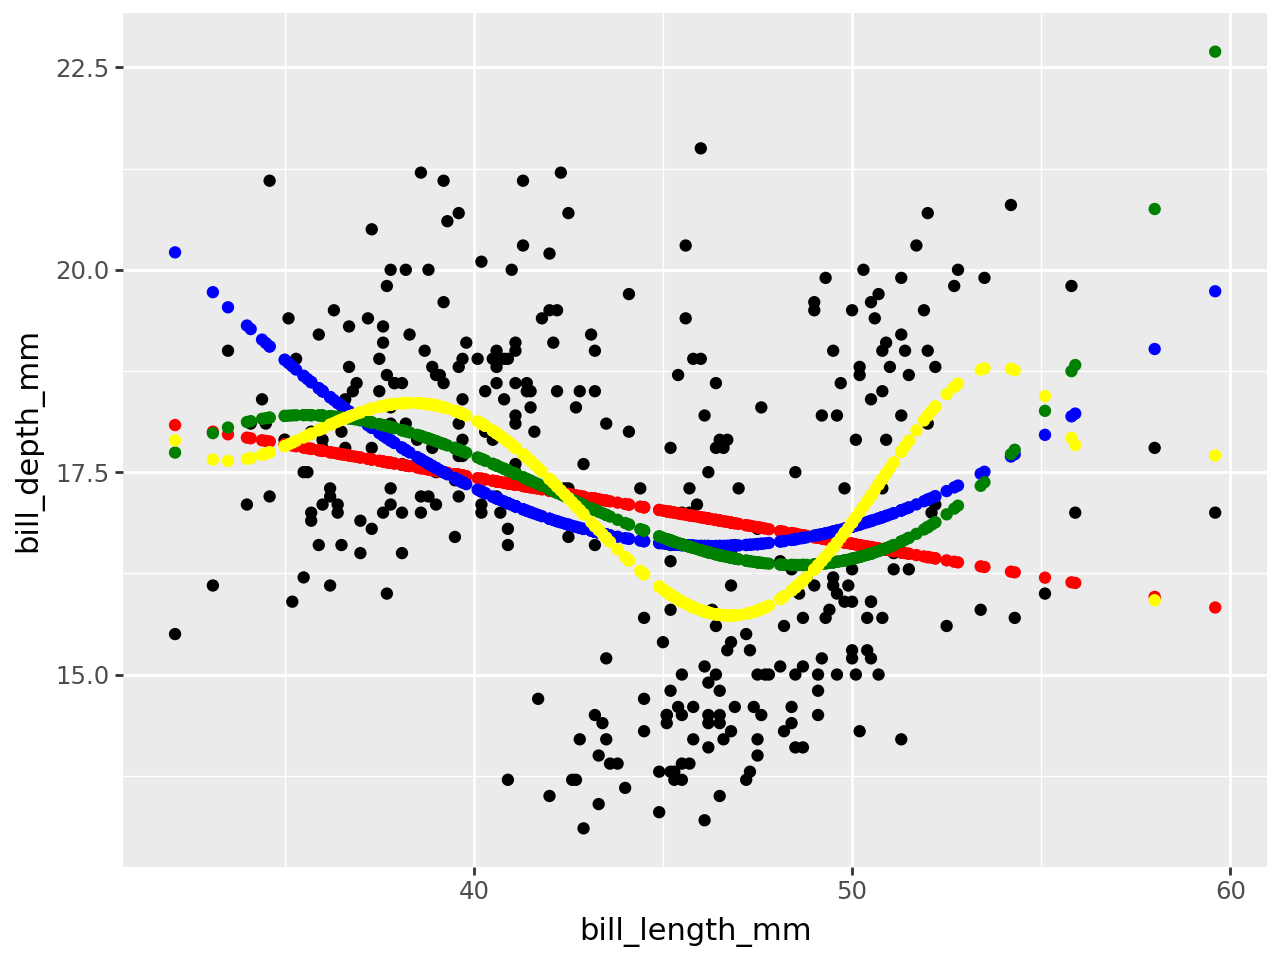

In [114]:
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_point, geom_line


(ggplot(df, aes(x='bill_length_mm', y='bill_depth_mm'))
 + geom_point()
 + geom_point(aes(y = pred1), color = "red")
 + geom_point(aes(y = pred2), color = "blue")
 + geom_point(aes(y = pred3), color = "green")
 + geom_point(aes(y = pred10), color = "yellow"))



* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The simple linear model is underfitting the data, while the polynomial model with a degree of 10 is overfitting. Based on the comparison between MSE and R^2 scores, the best fitting medol is model 3. This is because it's MSE is relatively lower than the other models, besides model 10, but has a lower MSE in the test data than model 10. We can tell from the graph that polynomial 10 model is trying find a pattern that doesn't exist, and this is reflected in the test MSE.